<a href="https://colab.research.google.com/github/NatFT/PythonCourse/blob/main/Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
 2   year    1304 non-null   int64         
 3   month   1304 non-null   category      
 4   day     1304 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 42.5 KB


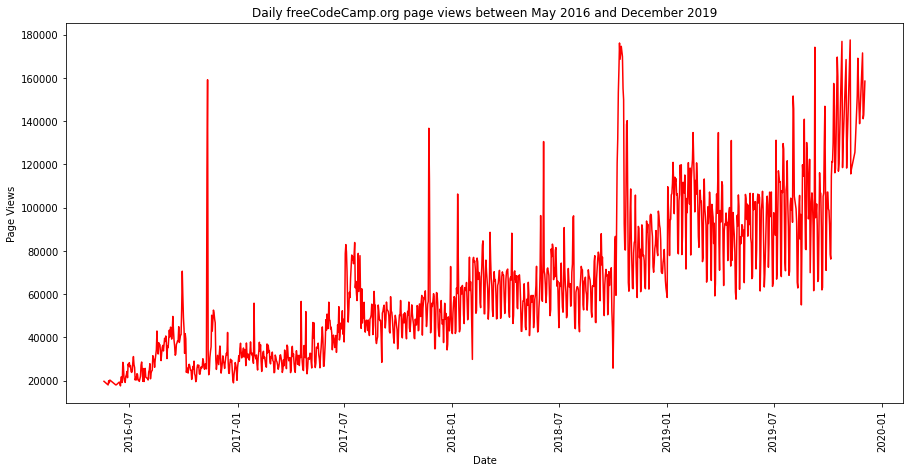

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

page_views = pd.read_csv('https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv')
# print(len(page_views))

page_views['date'] = pd.to_datetime(page_views['date'])
# page_views.info()
# page_views.head()

page_views['year'] = page_views['date'].dt.year
# page_views['month'] = pd.Categorical(page_views['date'].dt.strftime('%B'), ordered = True)
page_views['month'] = (page_views['date'].dt.strftime('%B')).astype('category')
page_views['day'] = page_views['date'].dt.day
page_views.info()
# display(page_views.head())

page_views.set_index('date')

page_views = page_views[page_views['value'] < page_views['value'].quantile(0.975)]
page_views = page_views[page_views['value'] > page_views['value'].quantile(0.025)]
# print(len(page_views))
plt.figure(figsize =(15, 7))
plt.plot(page_views['date'], page_views['value'], color = 'red')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp.org page views between May 2016 and December 2019')
plt.xticks(rotation=90)
plt.show()

#Seaborn better for resizing graphs

###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


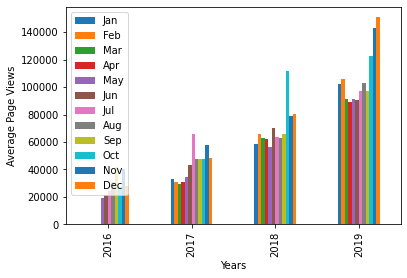

In [2]:
page_views['month_num'] = (page_views['date'].dt.strftime('%m')).astype('int')
df_pivot = pd.pivot_table(page_views, values = 'value', index = ['year'], columns = ['month_num'], aggfunc = np.mean)
# display(df_pivot)
df_pivot.plot(kind='bar')
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.legend(labels, loc = 'upper left')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.show()

# display(page_views)


###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


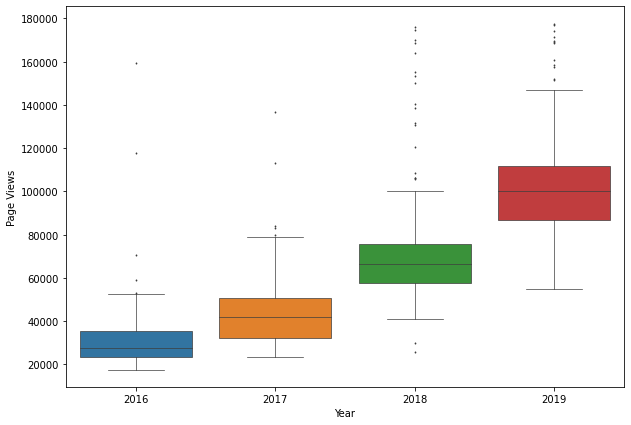

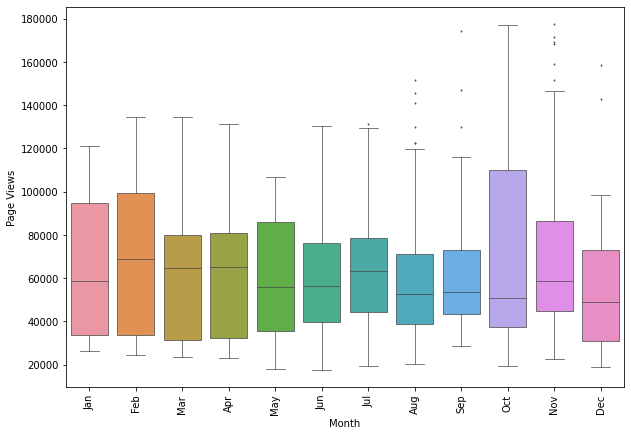

In [3]:
#page_views.info()

import seaborn as sns
plt.figure(figsize =(10, 7))
ax = sns.boxplot(data = page_views, x='year',y='value', linewidth=0.7, width = .8, fliersize=1)
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.show()
plt.figure(figsize =(10, 7))
ax2 = sns.boxplot(data = page_views, x='month_num',y='value', linewidth=0.7, width = .8, fliersize=1)
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.show()

###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


The expected number of page views in 2020 is 135,420
The expected number of page views in 2025 is 269,693
The expected number of page views in 2030 is 403,965


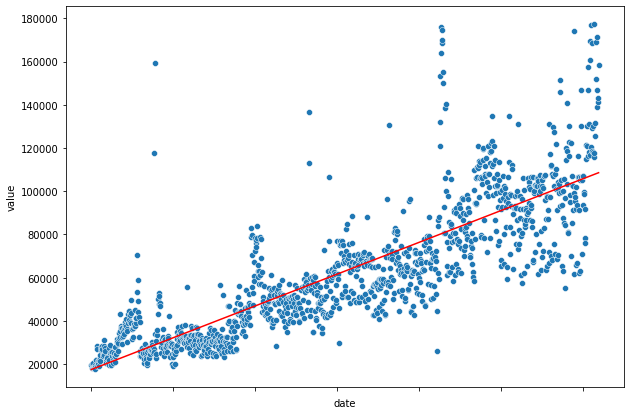

In [27]:
from scipy.stats import linregress
import datetime as dt
import numpy as np

page_views = pd.read_csv('https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv')


page_views['date'] = pd.to_datetime(page_views['date'])
page_views['year'] = page_views['date'].dt.year
page_views['month'] = (page_views['date'].dt.strftime('%B')).astype('category')
page_views['day'] = page_views['date'].dt.day
page_views['month_num'] = (page_views['date'].dt.strftime('%m')).astype('int')
page_views.set_index('date')

page_views = page_views[page_views['value'] < page_views['value'].quantile(0.975)]
page_views = page_views[page_views['value'] > page_views['value'].quantile(0.025)]

# page_views.info()
days = [i for i in range(0,len(page_views))]

page_views['date_ordinal'] = np.array(days) #page_views['date'].map(dt.datetime.toordinal)

# page_views.info()
# page_views.head()

plt.figure(figsize =(10, 7))

x = page_views['date_ordinal']
y = page_views['value']

chart = sns.scatterplot(x=x, y=y)
chart.set_xlabel('date')
chart.set_ylabel('value')

regression = linregress(x,y)
slope = regression.slope
intercept = regression.intercept

# print("slope = ",slope)
# print("intercept = ",intercept)

plt.plot(x, slope * x + intercept, color = 'red')
chart.set_xticklabels([])
plt.show

start_date = page_views.iloc[0]['date_ordinal']

print("The expected number of page views in 2020 is", "{:,}".format(int(round(slope * (page_views.iloc[-1]['date_ordinal'] + 365) + intercept, 0))))
print("The expected number of page views in 2025 is", "{:,}".format(int(round(slope * (page_views.iloc[-1]['date_ordinal'] + 365 * 6 ) + intercept, 0))))
print("The expected number of page views in 2030 is", "{:,}".format(int(round(slope * (page_views.iloc[-1]['date_ordinal'] + 365 * 11) + intercept, 0))))

# Reflect

What caused the biggest problems?
How did you solve these problems?